### Stroke Prediction Dataset - Acidente Vascular Cerebral
* https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

*  Stroke is a medical emergency. A stroke occurs when blood flow to a part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die within minutes

* Age: People aged 55 years and over

* Hypertension: if the systolic pressure is 140 mm Hg or more, or the diastolic pressure is 90 mm Hg or more

* Hypercholesterolemia: If the cholesterol level in the blood is 200 milligrams per deciliter

* Smoking

* Diabetes

* Obesity: if the body mass index (BMI) is 30 or more



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

## Pré-processamento

### Remoção ID feature e verificação de dados faltantes

In [6]:
df=df.drop(columns='id',axis=1)

In [7]:
df[df.isnull().any(axis=1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [8]:
# ### Substituição NAs BMI pela mediana
media = df['bmi'].mean()
#preenche NAs
df['bmi'].fillna(media, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Encoding Categorical Features
* https://www.kaggle.com/code/alexisbcook/categorical-variables/tutorial
* https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [10]:
from sklearn.preprocessing import LabelEncoder

* Opção com LabelEncoder

In [11]:
# Opção passo a passo
labelencoder = LabelEncoder()
df['Residence_type'] = labelencoder.fit_transform(df['Residence_type'])
df['ever_married'] = labelencoder.fit_transform(df['ever_married'])
df['gender'] = labelencoder.fit_transform(df['gender'])


In [12]:
# # Otimizado
# labelencoder = LabelEncoder()
# df[["Residence_type","ever_married", "gender"]] = \
# df[["Residence_type","ever_married", "gender"]].apply(labelencoder.fit_transform)

* Atributos com mais de dois valores

In [13]:
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

In [28]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children'],
      dtype='object')

### Normalização dos dados

https://pt.linkedin.com/pulse/padroniza%C3%A7%C3%A3o-vs-normaliza%C3%A7%C3%A3o-jose-r-f-junior?trk=pulse-article

A normalização por reescala define, através de um valor mínimo e um valor máximo, um novo intervalo onde os valores de um atributo estarão contidos. Tipicamente, tal intervalo é definido como [0, 1]. Portanto, para este caso, a normalização por reescala de um atributo $j$ de um objeto $x_i$ pode ser calculada como:

$$ x_{ij} = \frac{x_{ij} - min_j}{max_j - min_j} $$

sendo min_j e max_j , nessa ordem, os valores mínimo e máximo do atributo $j$ para o conjunto de dados considerado.

Na normalização por padronização, os diferentes atributos contínuos poderão abranger diferentes intervalos, mas deverão possuir os mesmos valores para alguma medida de posição e de espalhamento/variação.
Essas medidas irão consistir na média e no desvio-padrão. Neste caso, o valor normalizado de um atributo $j$
em um objeto $i$ é dado por:

$$ x_{ij} = \frac{x_{ij} - \bar{x}_j}{\sigma_j} $$

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,False,True,False,False,False,False,True,False,False
1,0,61.0,0,0,1,0,202.21,28.893237,1,False,False,True,False,False,False,False,True,False
2,1,80.0,0,1,1,0,105.92,32.500000,1,False,False,True,False,False,False,True,False,False
3,0,49.0,0,0,1,1,171.23,34.400000,1,False,False,False,True,False,False,True,False,False
4,0,79.0,1,0,1,0,174.12,24.000000,1,False,False,True,False,False,False,False,True,False


In [16]:
columns = ['avg_glucose_level','bmi','age']
scaler = StandardScaler()
ajuste = scaler.fit(df[columns])
df[columns] = ajuste.transform(df[columns])

In [17]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,1.051434,0,1,1,1,2.706375,1.001234e+00,1,False,True,False,False,False,False,True,False,False
1,0,0.786070,0,0,1,0,2.121559,4.615554e-16,1,False,False,True,False,False,False,False,True,False
2,1,1.626390,0,1,1,0,-0.005028,4.685773e-01,1,False,False,True,False,False,False,True,False,False
3,0,0.255342,0,0,1,1,1.437358,7.154182e-01,1,False,False,False,True,False,False,True,False,False
4,0,1.582163,1,0,1,0,1.501184,-6.357112e-01,1,False,False,True,False,False,False,False,True,False


## Modelos de Machine Learning

### Separação entre treino e teste

In [18]:
X = df.drop(['stroke'], axis=1).values
y = df['stroke'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Randon Forest

In [20]:
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(X_train, y_train)
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)

y_pred = forest.predict(X_test)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)

Training Score 1.0
Testing Score 
 0.9484670580560991


### Métricas

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

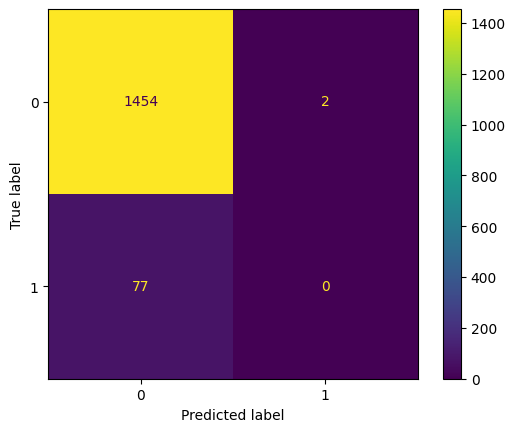

In [22]:
cm = confusion_matrix(y_test, y_pred)
# print(cm)
ConfusionMatrixDisplay(cm).plot()

In [23]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children'],
      dtype='object')

In [24]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [25]:
# Acuracidade
print("ACC: %.3f" %(accuracy_score(y_test,y_pred)))
#Revocação
print("Recall :%.2f" %(recall_score(y_test,y_pred)))
#Precisão
print("Precision :%.2f" %(precision_score(y_test,y_pred)))
#F1-score
print("F1-score :%.2f" %(f1_score(y_test,y_pred)))


ACC: 0.948
Recall :0.00
Precision :0.00
F1-score :0.00


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1456
           1       0.00      0.00      0.00        77

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533

